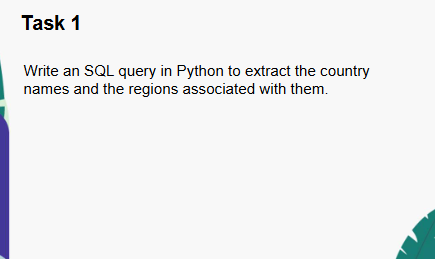

In [2]:
import mysql.connector as sql
db=sql.connect(host="localhost",user="root",password="JESUSISKING100",database="hr")
mycursor=db.cursor()

In [4]:
# `countries`,`regions`
q="select c.country_name,r.region_name from countries as c  join regions as r on c.region_id=r.region_id;"

In [6]:
mycursor.execute(q)
for x in mycursor:
    print(x)

('Belgium', 'Europe')
('Switzerland', 'Europe')
('Germany', 'Europe')
('Denmark', 'Europe')
('France', 'Europe')
('Italy', 'Europe')
('Netherlands', 'Europe')
('United Kingdom', 'Europe')
('Argentina', 'Americas')
('Brazil', 'Americas')
('Canada', 'Americas')
('Mexico', 'Americas')
('United States of America', 'Americas')
('Australia', 'Asia')
('China', 'Asia')
('HongKong', 'Asia')
('India', 'Asia')
('Japan', 'Asia')
('Singapore', 'Asia')
('Egypt', 'Middle East and Africa')
('Israel', 'Middle East and Africa')
('Kuwait', 'Middle East and Africa')
('Nigeria', 'Middle East and Africa')
('Zambia', 'Middle East and Africa')
('Zimbabwe', 'Middle East and Africa')


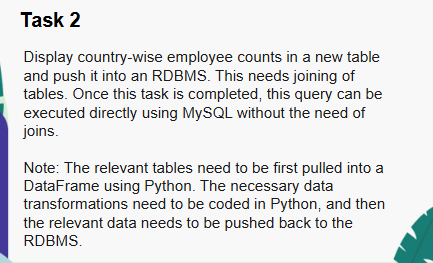

In [9]:
# display country wise employee count 
import pandas as pd
country="""select c.country_name,count(e.employee_id) as "employee_count" from `countries` as c join `locations` 
 as l on c.country_id=l.country_id join `departments` 
 as d on l.location_id=d.location_id join `employees`
 as e on d.department_id=e.department_id group by c.country_name order by employee_count desc ;"""

In [11]:
TP=pd.read_sql_query(country,db)
TP

C:\Users\asher\AppData\Local\Temp\ipykernel_19396\2683878774.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  TP=pd.read_sql_query(country,db)


,country_name,employee_count
0,United States of America,68
1,United Kingdom,35
2,Canada,2
3,Germany,1


In [13]:
import mysql.connector as sql 

In [15]:
import pandas as pd
from sqlalchemy import create_engine

In [17]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host='localhost', db='hr', user='root', pw='JESUSISKING100'))

In [19]:
TP.to_sql('country_wise_sales',engine,index=False)

4

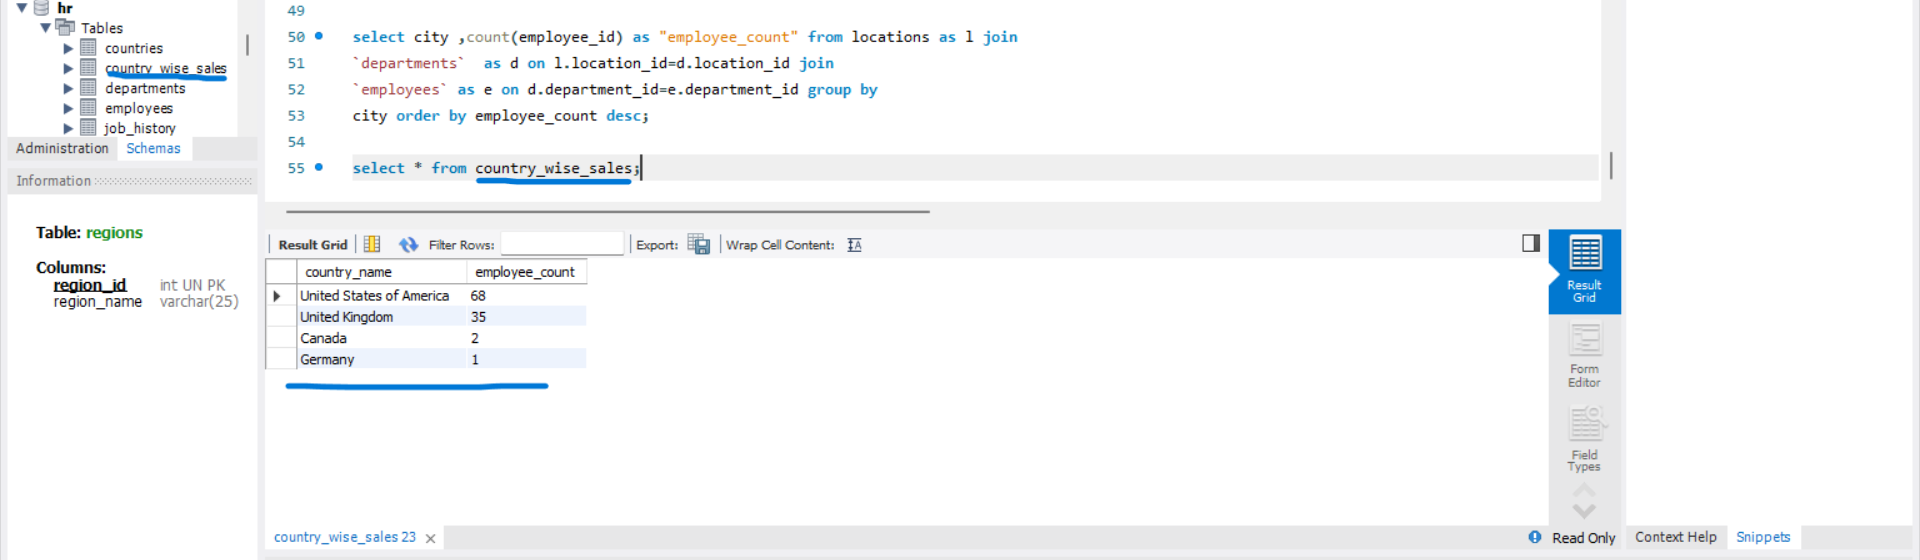

In [22]:
#country_wise_sales

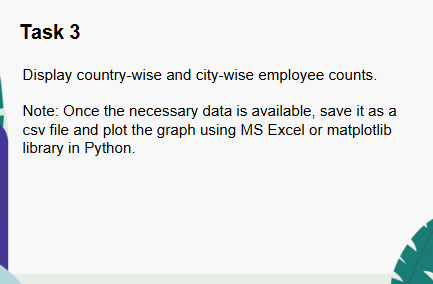

In [25]:
country="""select c.country_name,count(e.employee_id) as "employee_count" from `countries` as c join `locations` 
 as l on c.country_id=l.country_id join `departments` 
 as d on l.location_id=d.location_id join `employees`
 as e on d.department_id=e.department_id group by c.country_name order by employee_count desc ;"""

city="""select city ,count(employee_id) as "employee_count" from locations as l join 
`departments`  as d on l.location_id=d.location_id join
`employees` as e on d.department_id=e.department_id group by 
city order by employee_count desc;"""

In [27]:
mycursor.execute(country)
for x in mycursor:
    print(x)

('United States of America', 68)
('United Kingdom', 35)
('Canada', 2)
('Germany', 1)


In [29]:
mycursor.execute(city)
for x in mycursor:
    print(x)

('South San Francisco', 45)
('Oxford', 34)
('Seattle', 18)
('Southlake', 5)
('Toronto', 2)
('London', 1)
('Munich', 1)


# USING matplotlib.pyplot LIBRARY

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
TP=pd.read_sql_query(country,db)
TP

C:\Users\asher\AppData\Local\Temp\ipykernel_19396\2683878774.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  TP=pd.read_sql_query(country,db)


,country_name,employee_count
0,United States of America,68
1,United Kingdom,35
2,Canada,2
3,Germany,1


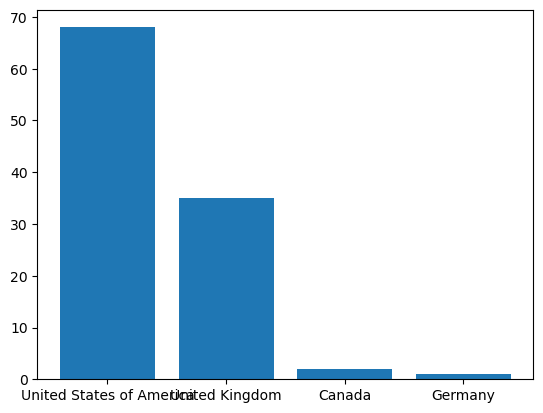

In [34]:
plt.bar(TP['country_name'],TP['employee_count'])
plt.show()

In [38]:
PE=pd.read_sql_query(city,db)
PE

C:\Users\asher\AppData\Local\Temp\ipykernel_19396\2417058943.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  PE=pd.read_sql_query(city,db)


,city,employee_count
0,South San Francisco,45
1,Oxford,34
2,Seattle,18
3,Southlake,5
4,Toronto,2
5,London,1
6,Munich,1


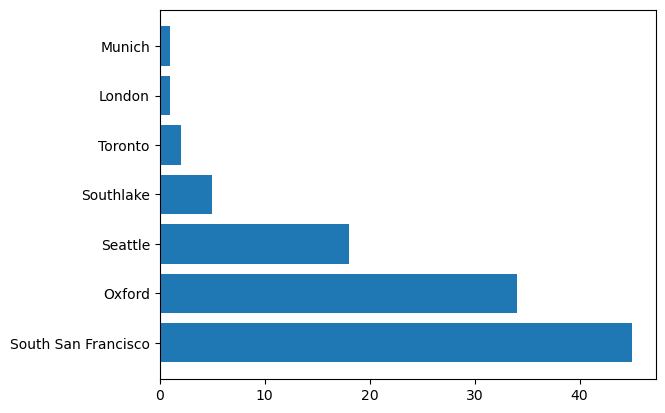

In [40]:
plt.barh(PE['city'],PE['employee_count'])
plt.show()

# USING EXCEL

In [43]:
TP=pd.read_sql_query(country,db)
TP.to_csv('country.csv',index=False)


C:\Users\asher\AppData\Local\Temp\ipykernel_19396\566782049.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  TP=pd.read_sql_query(country,db)


In [45]:
df=pd.read_csv('country.csv')
df

,country_name,employee_count
0,United States of America,68
1,United Kingdom,35
2,Canada,2
3,Germany,1


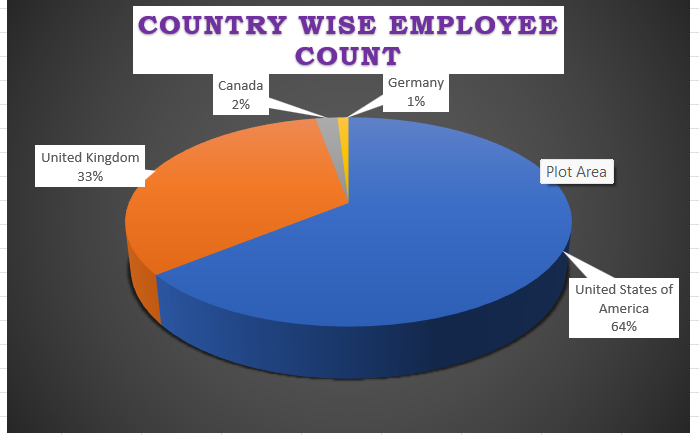

In [48]:
PE=pd.read_sql_query(city,db)
PE.to_csv('city.csv',index=False)

C:\Users\asher\AppData\Local\Temp\ipykernel_19396\1878644279.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  PE=pd.read_sql_query(city,db)


In [50]:
df1=pd.read_csv('city.csv')
df1

,city,employee_count
0,South San Francisco,45
1,Oxford,34
2,Seattle,18
3,Southlake,5
4,Toronto,2
5,London,1
6,Munich,1


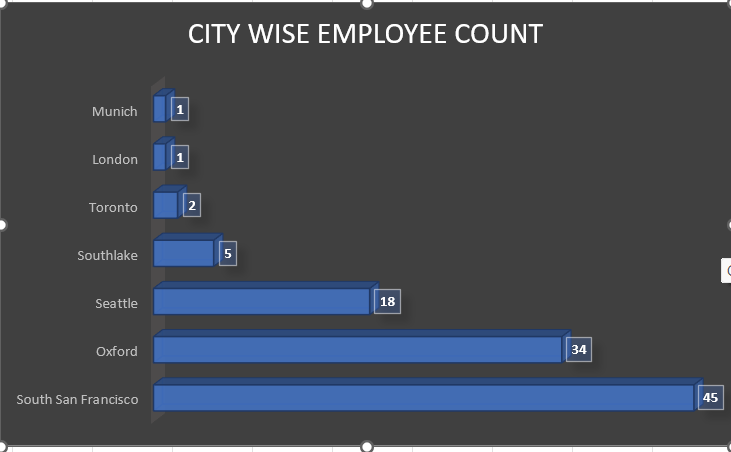

# NOTE: WE FIRST LOADED THE DATA FROM SQL BY EXECUTING THE QUERY THROUGH PYTHON THEN WE CONVERTED THE LOADED QUERY WHICH WAS TABLE INTO PANDAS DATAFRAME WE USED MATPLOTLIB TO PLOT IT WE DID IT THEN WE TRIED TO DO IN EXCEL WHICH WE ALSO DID FIRST WE CONVERTED THE DATA TO CSV FILE THE WE LOADED IT IN MS EXCEL THEN THE OUTPUT CHARTS WE TOOK SCREENSHOOT OF THE CHARTS WHICH WE MADE FROM THE DATA AND POSTED IT IN MARKDOWN THUS BY OBTAINING THE RESULT

# INTEPRERATION:USA HAS THE MOST EMPLOYEES ,GERMANY HAS LEAST EMPLOYEES.IN THE CITY TABLE South San francisco has most employees 45 and Munich  and Londan has least employees. 